In [ ]:
#The local file is used for the reproducibilty

import pandas as pd 

df = pd.read_csv("data/online_retail.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
#Customer ID and Description columns have some missing values
#InvoiceDate Datatype should be datetime
#CustomerID Datatype should be int

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [8]:
df.shape

(1067371, 8)

In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [11]:
#Quantity can't be minus

In [12]:
df["Country"].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [13]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     5918
REGENCY CAKESTAND 3 TIER               4412
JUMBO BAG RED RETROSPOT                3469
ASSORTED COLOUR BIRD ORNAMENT          2958
PARTY BUNTING                          2765
                                       ... 
IVORY PENDANT SHELL NECKLACE              1
allocate stock for dotcom orders ta       1
PAINTED HEART WREATH WITH BELL            1
FLOWER FAIRY MUG+COASTER,ROSE             1
Zebra invcing error                       1
Name: Description, Length: 5698, dtype: int64

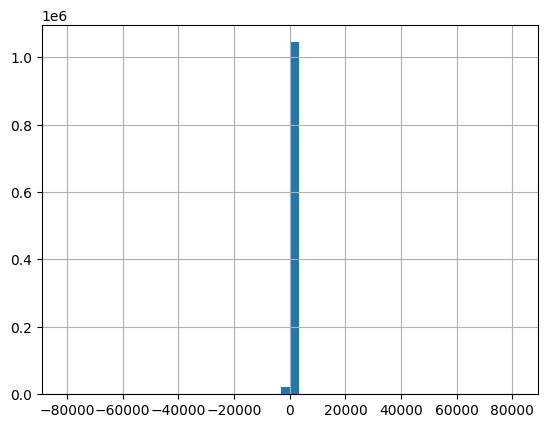

In [14]:
import matplotlib.pyplot as plt
df['Quantity'].hist(bins=50)
plt.show()

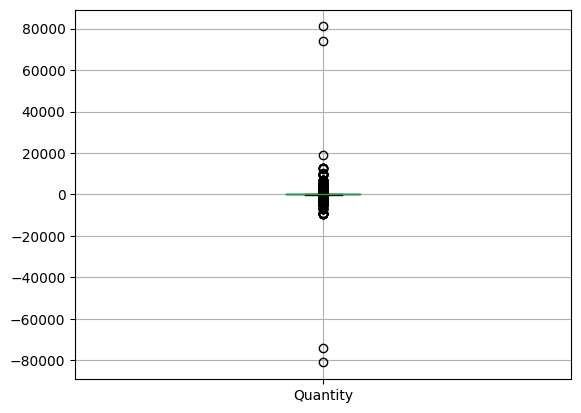

In [15]:
df.boxplot(column=['Quantity'])
plt.show()

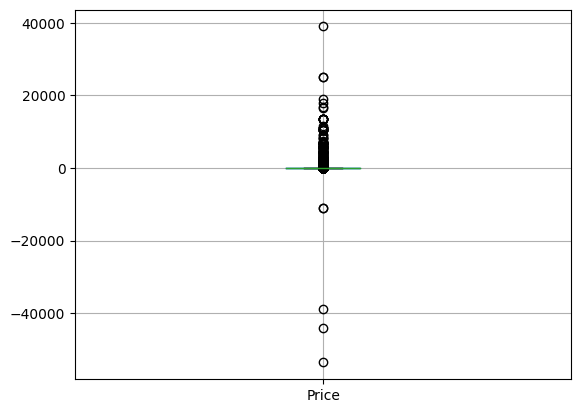

In [16]:
df.boxplot(column=['Price'])
plt.show()

In [17]:
print(f"Original number of rows : {df.shape[0]}")

Original number of rows : 1067371


In [18]:
df.dropna(subset=["Customer ID"], inplace= True)

In [19]:
print(f"Original number of rows after dropping null: {df.shape[0]}")

Original number of rows after dropping null: 824364


In [20]:
df= df[df["Quantity"] > 0]

In [21]:
print(f"Original number of rows after removing neagative values: {df.shape[0]}")

Original number of rows after removing neagative values: 805620


In [22]:
df.drop_duplicates(inplace =True)

In [23]:
print(f"Original number of rows after removing duplicates: {df.shape[0]}")

Original number of rows after removing duplicates: 779495


In [24]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [25]:
df["Customer ID"] = df["Customer ID"].astype(int).astype(str)

In [26]:
df.describe()

,Quantity,Price
count,779495.000000,779495.000000
mean,13.507085,3.218199
std,146.540284,29.674823
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


In [27]:
df_b2c= df[df["Quantity"] < 70000]

In [28]:
df_b2b= df[df["Quantity"] > 70000]

In [29]:
df_b2c.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [30]:
df_b2b.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
